Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [142]:
df = pd.read_csv("train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

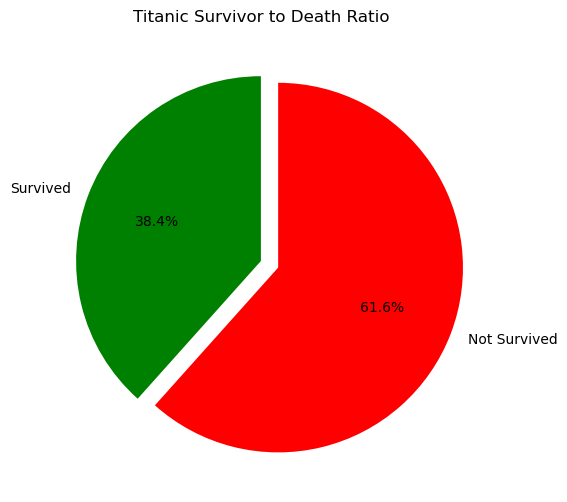

In [70]:
survived = (df["Survived"] == 1).sum()
not_survived = (df["Survived"] == 0).sum()

labels = ['Survived', 'Not Survived']
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie([survived, not_survived], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode = (0, 0.1))
plt.title('Titanic Survivor to Death Ratio')
plt.show()

Отримали пай чарт, вибрав відповідні кольори для кращого сприйняття, з діаграми видно що більше тритину людей вижило :)

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


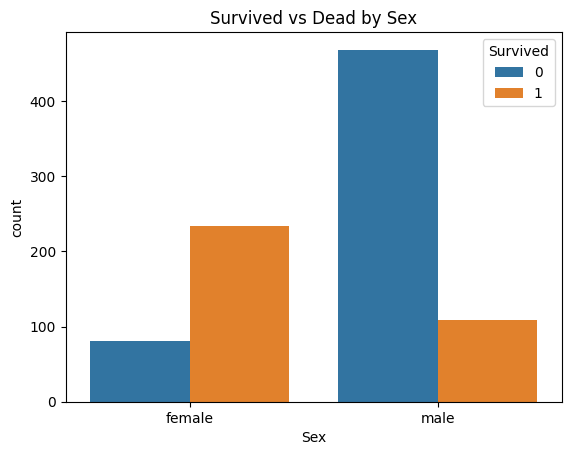

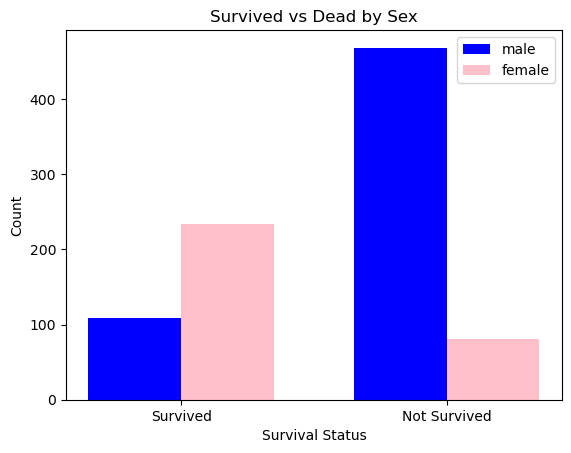

In [83]:
survived_male = ((df["Survived"] == 1) & (df["Sex"] == "male")).sum()
not_survived_male = ((df["Survived"] == 0) & (df["Sex"] == "male")).sum()

survived_female = ((df["Survived"] == 1) & (df["Sex"] == "female")).sum()
not_survived_female = ((df["Survived"] == 0) & (df["Sex"] == "female")).sum()

labels = ['Survived', 'Not Survived']
male_counts = [survived_male, not_survived_male]
female_counts = [survived_female, not_survived_female]

x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35
ax.bar(x, male_counts, width=bar_width, label='male', color='blue', align='center')
ax.bar([p + bar_width for p in x], female_counts, width=bar_width, label='female', color='pink', align='center')

ax.set_xlabel('Survival Status')
ax.set_ylabel('Count')
ax.set_title('Survived vs Dead by Sex')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Я побудував інакшу діаграму, вона як на мене краще сприймається за запропоновану

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

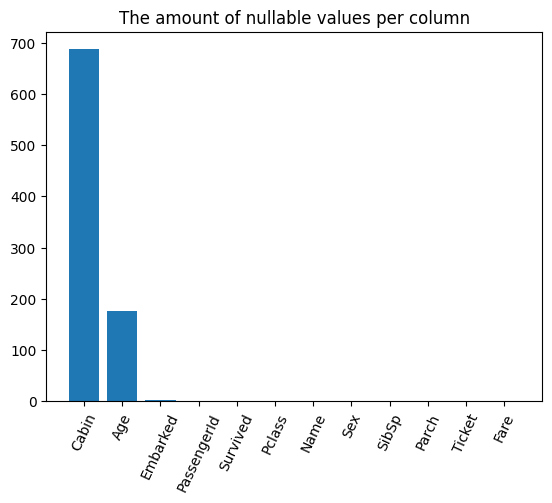

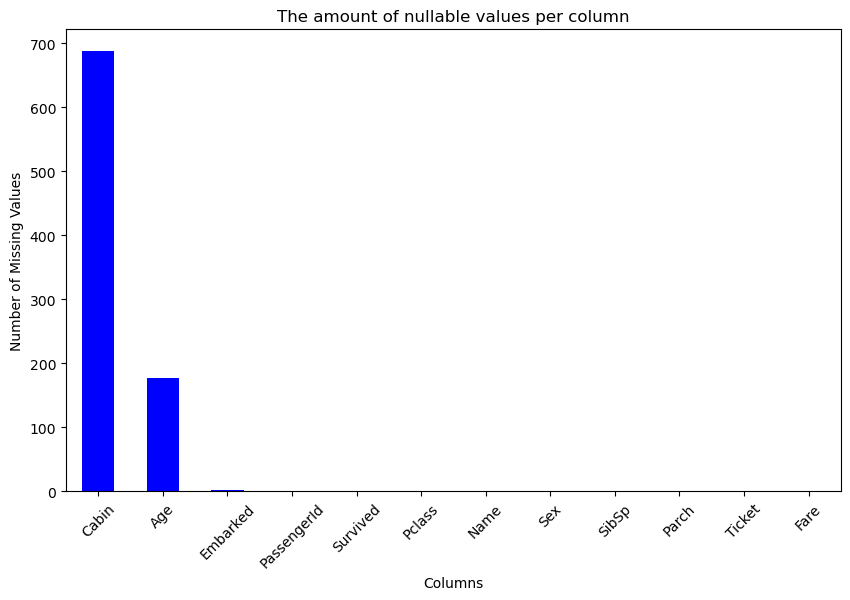

In [81]:
missing_values = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='blue')
plt.title('The amount of nullable values per column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

Я зробив більший графік, також варто підписувати осі для кращого розуміння і гарна ідея виставляти колонки за спаданням

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

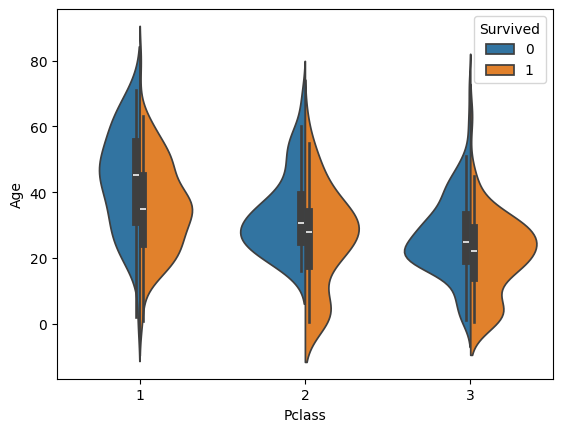

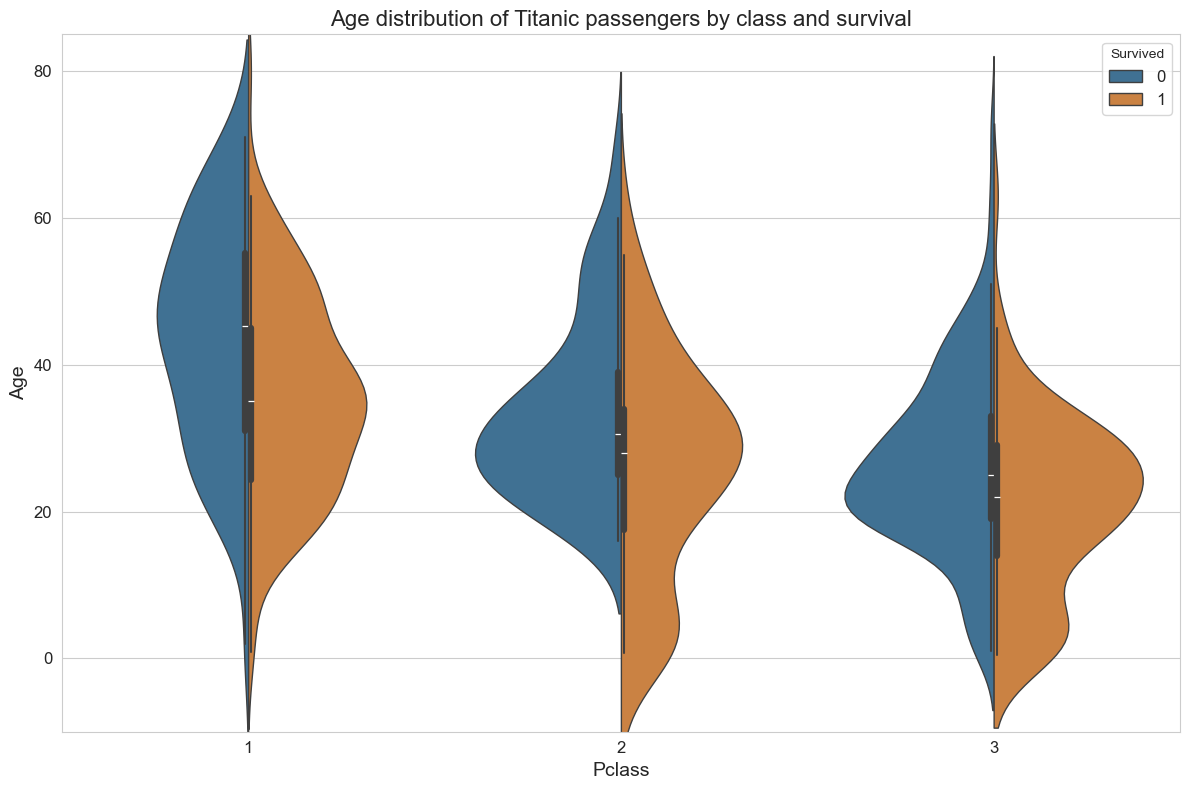

In [108]:
df_clean = df.dropna(subset=['Age'])

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.violinplot(x='Pclass', y='Age', hue='Survived',
                    data=df_clean, palette=['#3274A1', '#E1812C'],
                    split=True, inner='box', linewidth=1)

plt.title('Age distribution of Titanic passengers by class and survival', fontsize=16)
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys(), title='Survived', fontsize=12)
plt.ylim(-10, 85)
plt.tight_layout()
plt.show()

Не впевнений, що це найкраще рішення для візуалізації(я краще не придумав), як нам мене дуже важко сказти щось дуже конкретне...

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


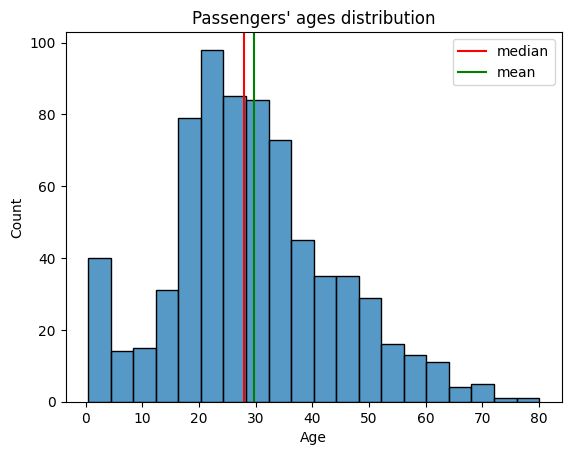

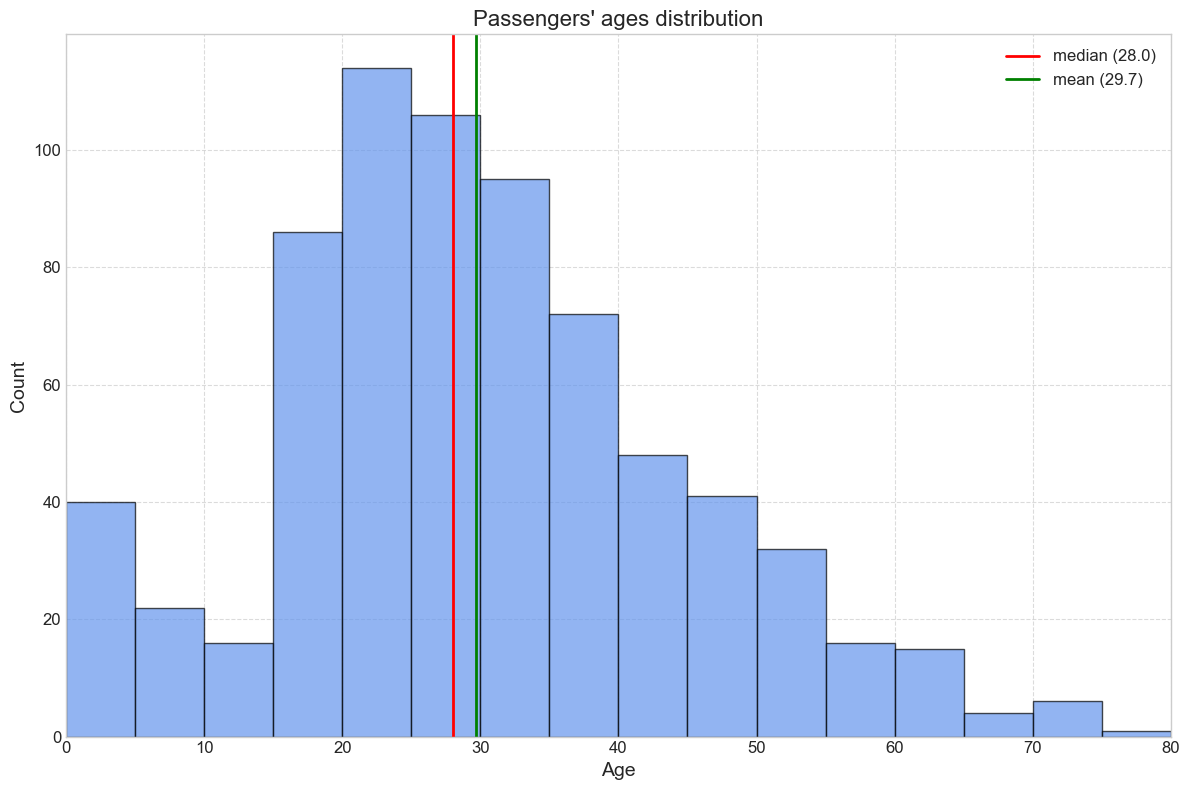

In [150]:
df_clean = df.dropna(subset=['Age'])

plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(df_clean['Age'], bins=range(0, 85, 5), edgecolor='black', color='#6495ED', alpha=0.7)

median_age = df_clean['Age'].median()
mean_age = df_clean['Age'].mean()

plt.axvline(x=median_age, color='red', linestyle='-', linewidth=2, label=f'median ({median_age:.1f})')
plt.axvline(x=mean_age, color='green', linestyle='-', linewidth=2, label=f'mean ({mean_age:.1f})')

plt.title('Passengers\' ages distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(0, 85, 10), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 80)
plt.tight_layout()
plt.show()

Графік дуже інфомативний, я не став зсувати з боків, бо там змістяться всі значення віку як на ващій діаграмі

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

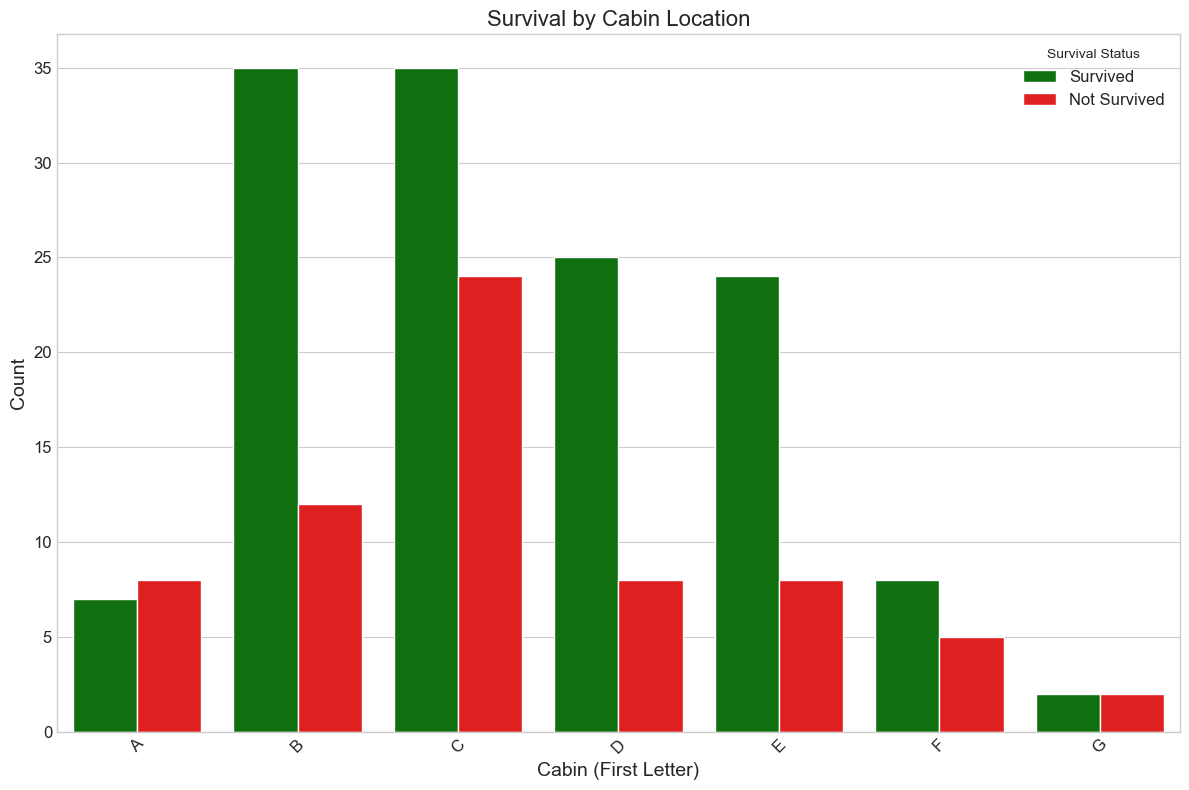

In [160]:
df_clean_cabin = df.dropna(subset=['Cabin']).copy()

df_clean_cabin['Cabin_Letter'] = df_clean_cabin['Cabin'].str[0]

cabin_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

df_clean_cabin['Survival_Status'] = df_clean_cabin['Survived'].map({1: 'Survived', 0: 'Not Survived'})

plt.figure(figsize=(12, 8))
sns.countplot(data=df_clean_cabin, x='Cabin_Letter', hue='Survival_Status', palette={'Survived': 'green', 'Not Survived': 'red'}, order=cabin_order)
plt.title('Survival by Cabin Location', fontsize=16)
plt.xlabel('Cabin (First Letter)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survival Status', fontsize=12)
plt.tight_layout()
plt.show()

На мою думку дуже цікаве питання і вийшла достатьньо інформативна діаграма, більшість даних сконцентрувалися у B C D та E класах, тому там данні більш значущі

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

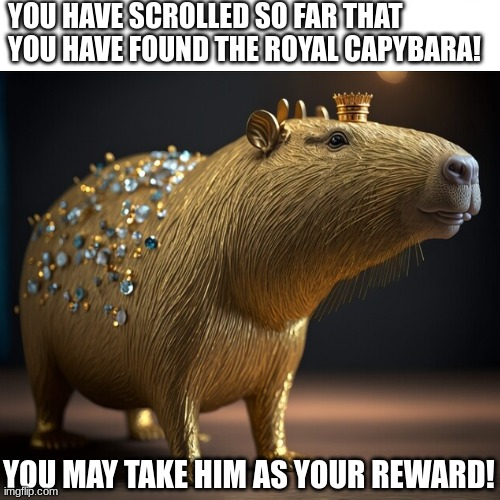